In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import re
import gensim
from gensim.models import CoherenceModel

In [2]:
df = pd.read_csv('./data/Jobs.csv')
df=df.dropna(subset=['Title','FullDescription','Company'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212338 entries, 0 to 244750
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Id                  212338 non-null  int64 
 1   Title               212338 non-null  object
 2   FullDescription     212338 non-null  object
 3   LocationRaw         212338 non-null  object
 4   LocationNormalized  212338 non-null  object
 5   ContractType        57146 non-null   object
 6   ContractTime        161887 non-null  object
 7   Company             212338 non-null  object
 8   Category            212338 non-null  object
 9   SalaryRaw           212338 non-null  object
 10  SalaryNormalized    212338 non-null  int64 
 11  SourceName          212337 non-null  object
dtypes: int64(2), object(10)
memory usage: 21.1+ MB


In [3]:
df = df.drop_duplicates(subset =['Title', 'FullDescription']).reset_index(drop=True)
df = df[(df['FullDescription'].str.contains('Data'))]

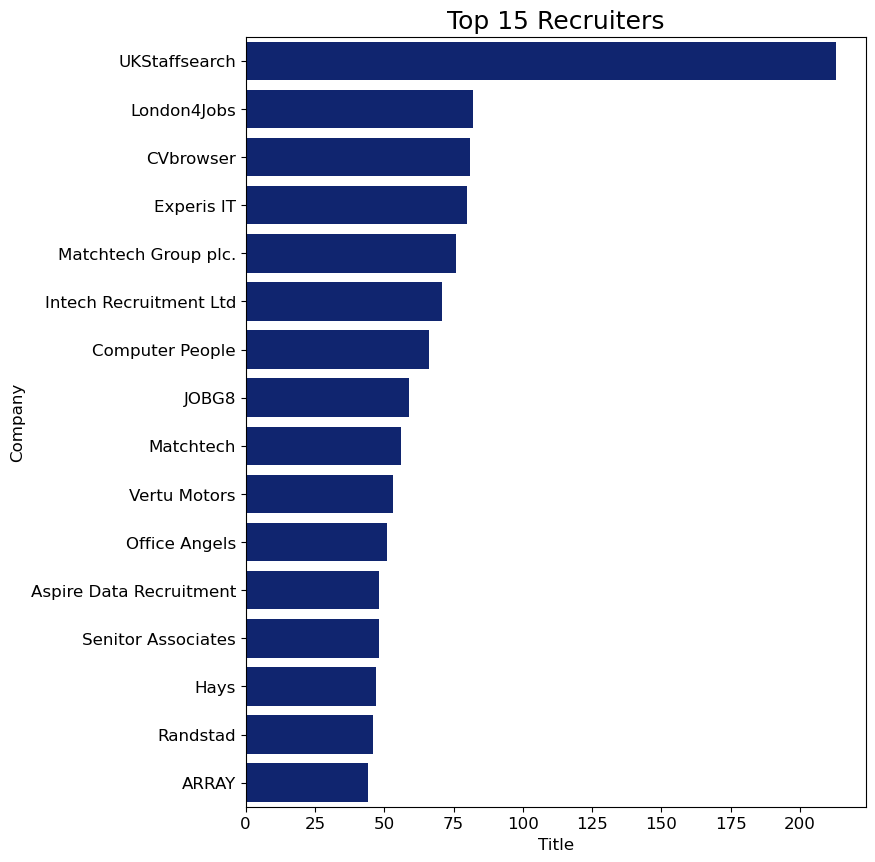

In [4]:
import matplotlib.pyplot as plt

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

# 1.Most frequent companies posting
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 10))

#Dataset relating to recruiters
rec_df = df.groupby('Company').count().sort_values(by='Title', ascending=False).reset_index()[['Company', 'Title']].copy()

# Plot the total crashes
sns.set_color_codes("dark")
sns.barplot(x="Title", y="Company", data=rec_df.loc[0:15,:],
            label="Total", color="b")

plt.title('Top 15 Recruiters', fontsize=18);

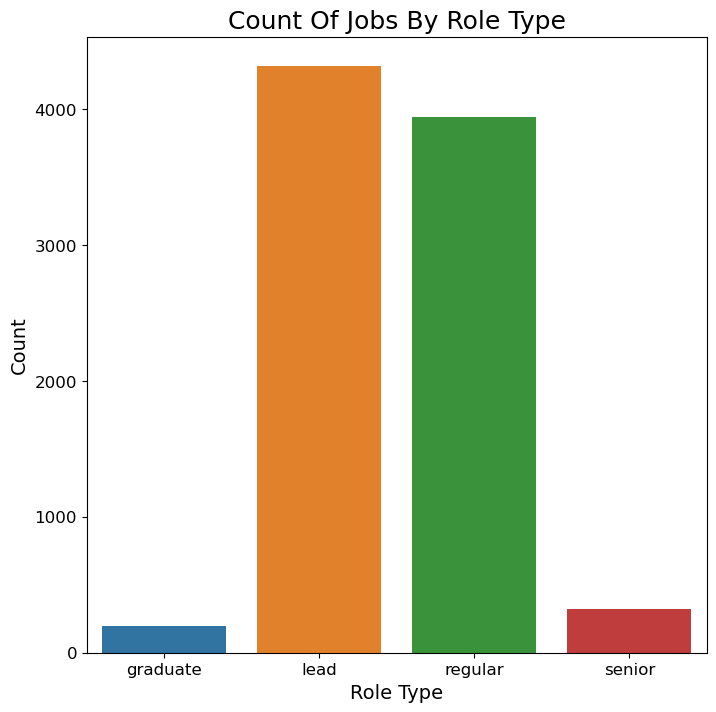

In [5]:
# Function to return the type of role based on keywords in the title.
def role_type(x):
    if 'lead' in x:
        return 'lead'
    elif 'head' in x:
        return 'lead'
    elif 'chief' in x:
        return 'lead'
    elif 'supervisor' in x:
        return 'senior'
    elif 'senior' in x:
        return 'senior'
    elif 'graduate' in x:
        return 'graduate'
    elif 'junior' in x:
        return 'graduate'
    else:
        return 'regular'
    
df['Role_Type'] = df['FullDescription'].apply(role_type)

job_df = df.groupby('Role_Type').count().reset_index()[['Role_Type', 'FullDescription']]

f, ax = plt.subplots(figsize=(8, 8))

sns.barplot(x='Role_Type', y='FullDescription', data=job_df)

ax.set_title('Count Of Jobs By Role Type', fontsize=18)
ax.set_xlabel('Role Type', fontsize=14)
ax.set_ylabel('Count', fontsize=14);

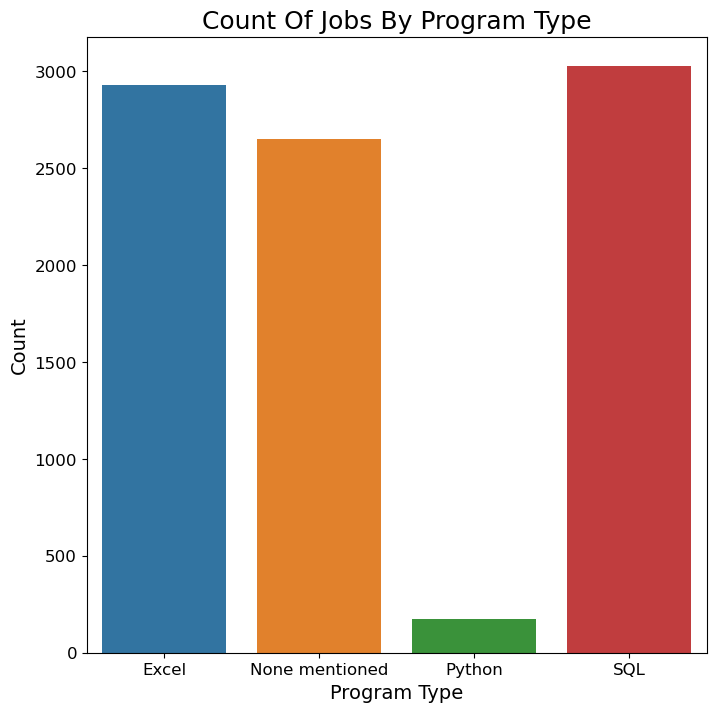

In [6]:
# 2.Function to return the program 
def program_req(x):
    if re.search('python', x.lower()):
            return 'Python'
    elif re.search('sql', x.lower()):
            return 'SQL'    
    elif re.search('excel', x.lower()):
            return 'Excel'    
    else:
        return 'None mentioned'  
    
df['Program'] = df['FullDescription'].apply(program_req)

prog_df = df.groupby('Program').count().reset_index()[['Program', 'Title']]

f, ax = plt.subplots(figsize=(8,8))

sns.barplot(x='Program', y='Title', data=prog_df)

ax.set_title('Count Of Jobs By Program Type', fontsize=18)
ax.set_xlabel('Program Type', fontsize=14)
ax.set_ylabel('Count', fontsize=14);